C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error: 1469444444.4444542
R-squared Score: nan

Test set inputs (X_test):
   Area  Rooms
1   800      3

Actual prices (y_test):
[180000]

Predicted prices (y_pred):
[141666.66666667]


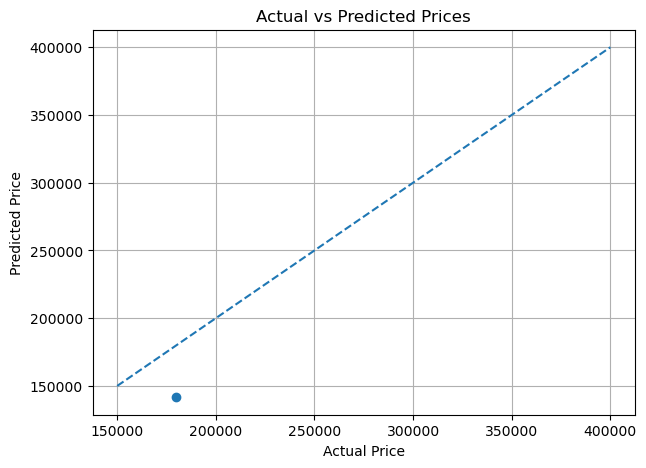

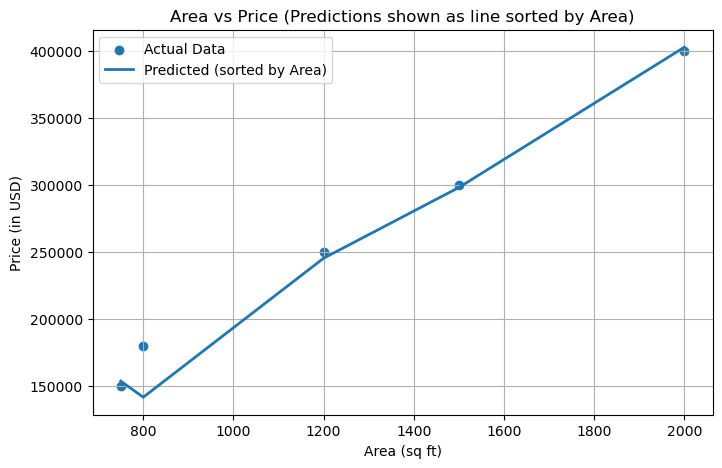

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample dataset (This is sample dataset, we can use a real .csv file dataset)
data = {
    "Area": [750, 800, 1200, 1500, 2000],
    "Rooms": [2, 3, 3, 4, 5],
    "Price": [150000, 180000, 250000, 300000, 400000],
}
df = pd.DataFrame(data)

# Features (Area, Rooms) and Target (Price)
X = df[["Area", "Rooms"]]
y = df["Price"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Print test inputs and predictions for clarity
print("\nTest set inputs (X_test):")
print(X_test)
print("\nActual prices (y_test):")
print(y_test.values)
print("\nPredicted prices (y_pred):")
print(y_pred)

# -----------------------
# Visualization A (Recommended)
# Actual vs Predicted scatter plot
# -----------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)               # actual vs predicted
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--')  # y = x line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

# -----------------------
# Visualization B (Optional)
# Area vs Predicted price (sorted) — still only a slice of the multivariate surface
# -----------------------
predicted_all = model.predict(df[["Area", "Rooms"]])
sort_idx = np.argsort(df["Area"].values)
area_sorted = df["Area"].values[sort_idx]
price_sorted = df["Price"].values[sort_idx]
pred_sorted = predicted_all[sort_idx]

plt.figure(figsize=(8,5))
plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(area_sorted, pred_sorted, label="Predicted (sorted by Area)", linewidth=2)
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (in USD)")
plt.title("Area vs Price (Predictions shown as line sorted by Area)")
plt.legend()
plt.grid(True)
plt.show()
